In [332]:
import numpy as np
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

In [333]:
#have the datafile in the same directory as this notebook or else modify
inFile = "bountiful_2013_11_22_1614UTC_reprocessed.txt"

# pa, te, rh, spd, ang, lat, lon, alt, td
cols = (1,2,3,4,5,6,7,8,12)
data = np.genfromtxt(inFile, skip_header = 1, usecols = cols, unpack = True, delimiter = '\t',filling_values=-9999)
pa, te, rh, spd, ang, lat, lon, alt, td = data[0:]
alt = alt/1000.
#print(data)


In [334]:
#get data below 10 km
tag = np.zeros(alt.shape)
tag[alt<=10] = 1
alt = alt[tag==1]
te = te[tag==1]
rh = rh[tag==1]
spd = spd[tag==1]
ang = ang[tag==1]
td = td[tag==1]
pa= pa[tag==1]

<Figure size 648x648 with 0 Axes>

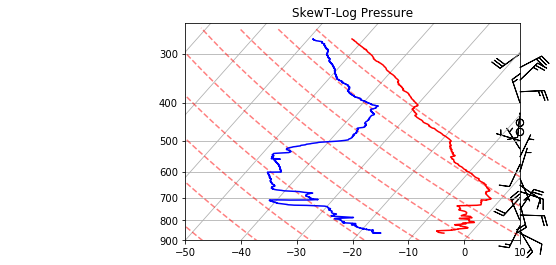

In [335]:
figname3 =  "./skewt.png"
fig = plt.figure(figsize=(9,9))
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(pa[pa!=-9999],te[pa!=-9999], 'r')
skew.plot(pa[pa!=-9999],td[pa!=-9999], 'b')
u, v = mpcalc.wind_components(spd[spd!=-9999], ang[ang!=-9999])

#skew.plot_barbs(pa[pa!=-9999], u, v)
# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(300, 900, 25) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(pa[pa!=-9999], my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(pa[ix], u[ix], v[ix])

# Add the relevant special lines
t0 = np.arange(-40, 50, 10) * units.degC
skew.plot_dry_adiabats(t0=t0)
#skew.plot_moist_adiabats()
#skew.plot_mixing_lines()
skew.ax.set_ylim(900, 250)
skew.ax.set_xlim(-50, 10)
plt.title('SkewT-Log Pressure', fontsize = 12)

fig = plt.gcf()
fig.savefig(figname3)
plt.show()
plt.close()

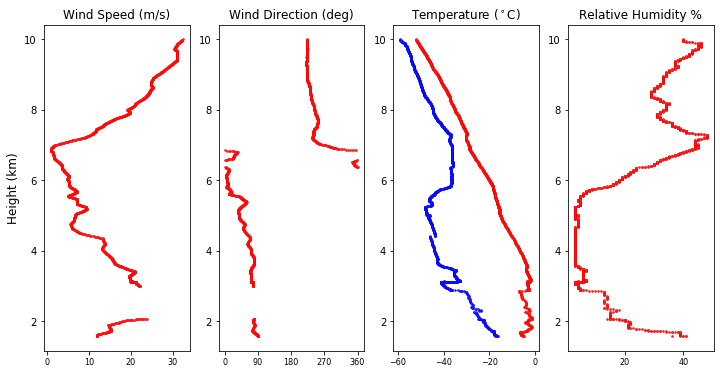

In [336]:
figname1 =  "./sounding.png"
fig = plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.15)

# plot wind speed
ax1 = fig.add_subplot(1,4,1)
plt.plot(spd[spd!=-9999],alt[spd!=-9999],'o',ms=1.5, mfc='white', mec='red')
plt.title('Wind Speed (m/s)', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
plt.ylabel("Height (km)", fontsize = 12)

# plot wind direction
ax2 = fig.add_subplot(1,4,2)
plt.plot(ang[ang!=-9999],alt[ang!=-9999],'o',ms=1.5, mfc='white', mec='red')
plt.title('Wind Direction (deg)', fontsize = 12)
xtck = [0,90,180,270,360]
plt.xticks(xtck,fontsize = 8)
plt.yticks(fontsize = 10)
#plt.setp(plt.gca(),'yticks', [])

# plot Temperature and Dewpoint temperature
ax3 = fig.add_subplot(1,4,3)
plt.plot(te[te!=-9999],alt[te!=-9999],'o',ms=1.5, mfc='white', mec='red')
plt.plot(td[td!=-9999],alt[td!=-9999],'o',ms=1.5, mfc='white', mec='blue')
plt.title('Temperature ($^\circ$C)', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
#plt.setp(plt.gca(),'yticks', [])


# plot relative humidity
ax4 = fig.add_subplot(1,4,4)
plt.plot(rh[rh!=-9999],alt[rh!=-9999],'o',ms=1.5, mfc='white', mec='red')
plt.title('Relative Humidity %', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
#plt.setp(plt.gca(),'yticks', [])


fig.savefig(figname1, bbox_inches='tight',pad_inches=0.05)
plt.show()
plt.close()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 208 but corresponding boolean dimension is 1958

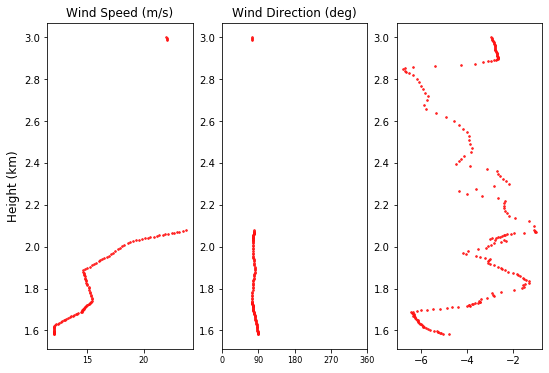

In [337]:
#now plot below 3 km AGL
figname2 = "./sounding_below_3km.png"
tag = np.zeros(alt.shape)
tag[alt<=3] = 1
alt = alt[tag==1]
te = te[tag==1]
td = td[tag==1]
rh = rh[tag==1]
spd = spd[tag==1]
ang = ang[tag==1]
pa= pa[tag==1]

fig = plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.15)

# plot wind speed
ax1 = fig.add_subplot(1,4,1)
plt.plot(spd[spd!=-9999],alt[spd!=-9999],'o',ms=1.5, mfc='white', mec='red')
plt.title('Wind Speed (m/s)', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
plt.ylabel("Height (km)", fontsize = 12)

# plot wind direction
ax2 = fig.add_subplot(1,4,2)
plt.plot(ang[ang!=-9999],alt[ang!=-9999],'o',ms=1.5, mfc='white', mec='red')
xtck = [0,90,180,270,360]
plt.xticks(xtck,fontsize = 8)
plt.title('Wind Direction (deg)', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
#plt.setp(plt.gca(),'yticks', [])


# plot Temperature and dewpoint temperature
ax3 = fig.add_subplot(1,4,3)
plt.plot(te[te!=-9999],alt[te!=-9999],'o',ms=1.5, mfc='white', mec='red')
plt.plot(td[td!=-9999],alt[td!=-9999],'o',ms=1.5, mfc='white', mec='blue')
plt.title('Temperature ($^\circ$C)', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
#plt.setp(plt.gca(),'yticks', [])

# plot relative humidity
ax4 = fig.add_subplot(1,4,4)
plt.plot(rh[rh!=-9999],alt[rh!=-9999],'o',ms=1.5, mfc='white', mec='red')
plt.title('Relative Humidity %', fontsize = 12)
#plt.setp(plt.gca(),'yticks', [])


fig.savefig(figname2, bbox_inches='tight',pad_inches=0.05)	
plt.show()
plt.close()